In [7]:
from rkstiff.etd35 import ETD35
from rkstiff.grids import construct_x_Dx_cheb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sine-Gordon equation:  $\phi_{tt} = \phi_{xx} - sin(\phi)$

            method may be unstable
            method may be unstable
            method may be unstable
            method may be unstable


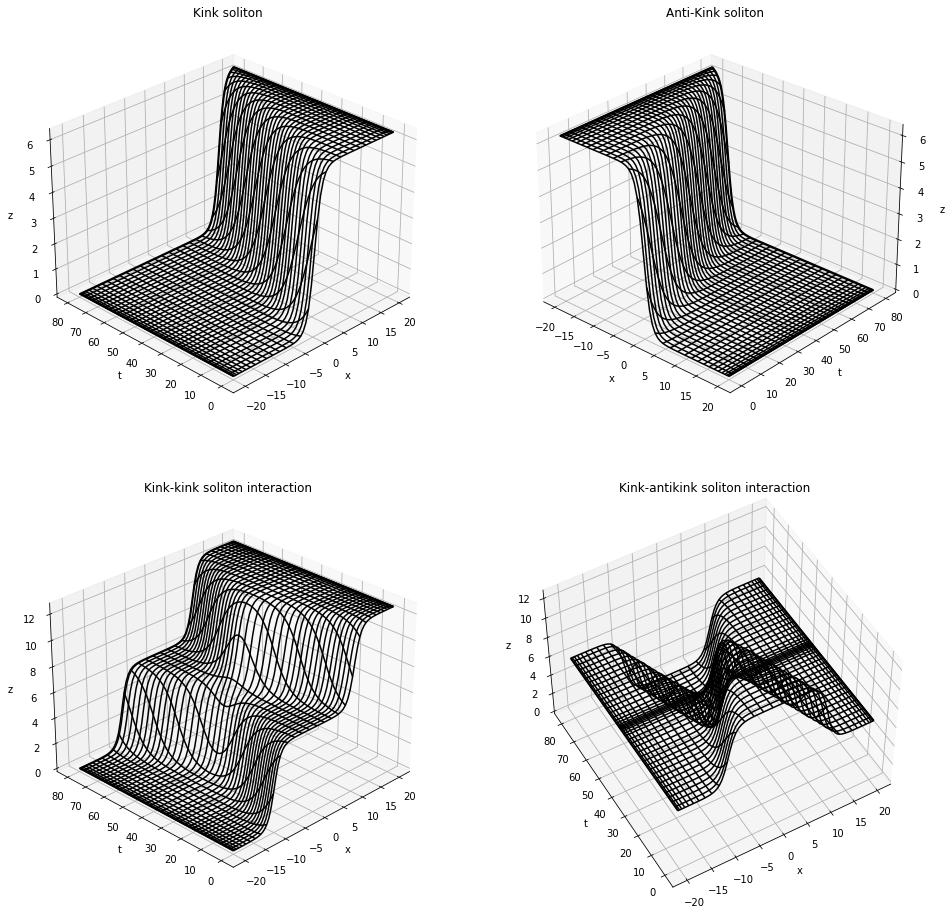

In [74]:
N = 100
L = 20
x,Dx = construct_x_Dx_cheb(N,-L,L)
v = 0.2

Dxx = Dx.dot(Dx)
L21 = Dxx[1:-1,1:-1]
L12 = np.eye(N-1)
Z = np.zeros(shape=(N-1,N-1))
L1 = np.c_[Z,L12]
L2 = np.c_[L21,Z]
linop = np.r_[L1,L2]

psi0_kink = 4*np.arctan(np.exp(x[1:-1]/np.sqrt(1-v**2))) - (x[1:-1]+L)*np.pi/L
dpsi0_kink = (-2*v/np.sqrt(1-v**2))/np.cosh(x[1:-1]/np.sqrt(1-v**2))
psi0_antikink = 4*np.arctan(np.exp(-x[1:-1]/np.sqrt(1-v**2))) - (L - x[1:-1])*np.pi/L
dpsi0_antikink = (-2*v/np.sqrt(1-v**2))/np.cosh(x[1:-1]/np.sqrt(1-v**2))

psi0_kink_kink = 4*np.arctan(np.exp( (x[1:-1]+L/2)/np.sqrt(1-c**2))) + \
        4*np.arctan(np.exp( (x[1:-1]-L/2) /np.sqrt(1-c**2))) - 2*(x[1:-1]+L)*np.pi/L
dpsi0_kink_kink = -2*c/(np.cosh((x[1:-1]+L/2)/np.sqrt(1-c**2))*np.sqrt(1-c**2)) + \
     2*c/(np.cosh((x[1:-1]-L/2)/np.sqrt(1-c**2))*np.sqrt(1-c**2))

psi0_kink_antikink = 4*np.arctan(np.exp( (x[1:-1]+L/2) /np.sqrt(1-c**2))) + \
        4*np.arctan(np.exp( -(x[1:-1]-L/2) /np.sqrt(1-c**2))) - 2*np.pi
dpsi0_kink_antikink = -2*c/(np.cosh((x[1:-1]+L/2)/np.sqrt(1-c**2))*np.sqrt(1-c**2)) + \
     -2*c/(np.cosh((x[1:-1]-L/2)/np.sqrt(1-c**2))*np.sqrt(1-c**2))

Dxx = Dx.dot(Dx)
L21 = Dxx[1:-1,1:-1]
L12 = np.eye(N-1)
Z = np.zeros(shape=(N-1,N-1))
L1 = np.c_[Z,L12]
L2 = np.c_[L21,Z]
linop = np.r_[L1,L2]

def NL_kink(w):
    u = w[:N-1].real
    return np.r_[np.zeros(N-1),-np.sin(u+(x[1:-1]+L)*np.pi/L)]

def NL_antikink(w):
    u = w[:N-1].real
    return np.r_[np.zeros(N-1),-np.sin(u+np.pi*(L-x[1:-1])/L)]

def NL_kink_kink(w):
    u = w[:N-1].real
    return np.r_[np.zeros(N-1),-np.sin(u+2*(x[1:-1]+L)*np.pi/L)]

def NL_kink_antikink(w):
    u = w[:N-1].real
    return np.r_[np.zeros(N-1),-np.sin(u+2*np.pi)]

tf = 80
solver_kink = ETD35(linop=linop,NLfunc=NL_kink,epsilon=1e-4,contour_radius=1,contour_points=32,diagonalize=True)
solver_antikink = ETD35(linop=linop,NLfunc=NL_antikink,epsilon=1e-4,contour_radius=1,contour_points=32,diagonalize=True)
solver_kink_kink = ETD35(linop=linop,NLfunc=NL_kink_kink,epsilon=1e-4,contour_radius=1,contour_points=32,diagonalize=True)
solver_kink_antikink = ETD35(linop=linop,NLfunc=NL_kink_antikink,epsilon=1e-4,contour_radius=1,contour_points=32,diagonalize=True)
_ = solver_kink.evolve(np.r_[psi0_kink,dpsi0_kink],t0=0,tf=tf)
_ = solver_antikink.evolve(np.r_[psi0_antikink,dpsi0_antikink],t0=0,tf=tf)
_ = solver_kink_kink.evolve(np.r_[psi0_kink_kink,dpsi0_kink_kink],t0=0,tf=tf)
_ = solver_kink_antikink.evolve(np.r_[psi0_kink_antikink,dpsi0_kink_antikink],t0=0,tf=tf)

Ukink = []
for wv in solver_kink.u:
    wint = wv[:N-1].real
    uint = wint + (x[1:-1]+L)*np.pi/L
    u = np.r_[0,uint,2*np.pi]
    Ukink.append(u)
Ukink = np.array(Ukink); 
t = np.array(solver_kink.t)
Tkink,Xkink = np.meshgrid(t,x,indexing='ij')
    
Uantikink = []
for wv in solver_antikink.u:
    wint = wv[:N-1].real
    uint = wint + (L - x[1:-1])*np.pi/L
    u = np.r_[2*np.pi,uint,0]
    Uantikink.append(u)
Uantikink = np.array(Uantikink)
t = np.array(solver_antikink.t)
Tantikink,Xantikink = np.meshgrid(t,x,indexing='ij')

Ukink_kink = []
for wv in solver_kink_kink.u:
    wint = wv[:N-1].real
    uint = wint + (x[1:-1]+L)*2*np.pi/L
    u = np.r_[0,uint,4*np.pi]
    Ukink_kink.append(u)
Ukink_kink = np.array(Ukink_kink); 
t = np.array(solver_kink_kink.t)
Tkink_kink,Xkink_kink = np.meshgrid(t,x,indexing='ij')
    
Ukink_antikink = []
for wv in solver_kink_antikink.u:
    wint = wv[:N-1].real
    uint = wint + 2*np.pi
    u = np.r_[2*np.pi,uint,2*np.pi]
    Ukink_antikink.append(u)
Ukink_antikink = np.array(Ukink_antikink)
t = np.array(solver_kink_antikink.t)
Tkink_antikink,Xkink_antikink = np.meshgrid(t,x,indexing='ij')

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(2,2,1,projection='3d')
ax.plot_wireframe(Xkink,Tkink,Ukink,color='black')
ax.view_init(elev=28,azim=-135)
ax.set_title('Kink soliton')
ax = fig.add_subplot(2,2,2,projection='3d')
ax.plot_wireframe(Xantikink,Tantikink,Uantikink,color='black')
ax.view_init(elev=28,azim=-48)
ax.set_title('Anti-Kink soliton')
ax = fig.add_subplot(2,2,3,projection='3d')
ax.plot_wireframe(Xkink_kink,Tkink_kink,Ukink_kink,color='black')
ax.view_init(elev=28,azim=-135)
ax.set_title('Kink-kink soliton interaction')
ax = fig.add_subplot(2,2,4,projection='3d')
ax.plot_wireframe(Xkink_antikink,Tkink_antikink,Ukink_antikink,color='black')
ax.view_init(elev=50,azim=-120)
ax.set_title('Kink-antikink soliton interaction')

for ax in fig.axes:
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('z')
    ax.set_facecolor('white')

